 **The Spark Foundation #GRIPAug21**

**TASK2:Prediction using Unsupervised ML**

**AUTHOR: Niharika Goel**

**From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.**


Dataset = Iris.csv

# Importing the libraries

In [22]:
# Importing the libraries
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for data analysis
import dabl

# Load the iris dataset
from sklearn import datasets
iris_df = pd.read_csv("Iris.csv",index_col="Id")
iris_df.head() # See the first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
iris_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Understanding the data

In [24]:
iris_df.shape

(150, 5)

In [25]:
iris_df.tail

<bound method NDFrame.tail of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0  

In [26]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
iris_df.isnull().any().any()

False

In [28]:
iris_df.value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
4.9            3.1           1.5            0.1           Iris-setosa        3
5.8            2.7           5.1            1.9           Iris-virginica     2
               4.0           1.2            0.2           Iris-setosa        1
5.9            3.0           4.2            1.5           Iris-versicolor    1
6.2            3.4           5.4            2.3           Iris-virginica     1
                                                                            ..
5.5            2.3           4.0            1.3           Iris-versicolor    1
               2.4           3.7            1.0           Iris-versicolor    1
                             3.8            1.1           Iris-versicolor    1
               2.5           4.0            1.3           Iris-versicolor    1
7.9            3.8           6.4            2.0           Iris-virginica     1
Length: 147, dtype: int64

# Data visualization

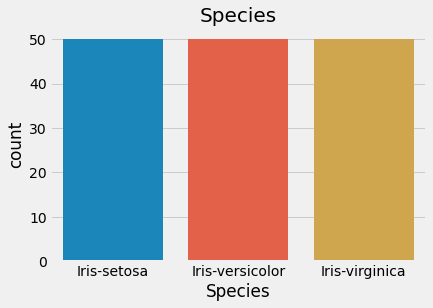

In [29]:
sns.countplot(x='Species',data=iris_df)
plt.title('Species',fontsize=20)
plt.show()

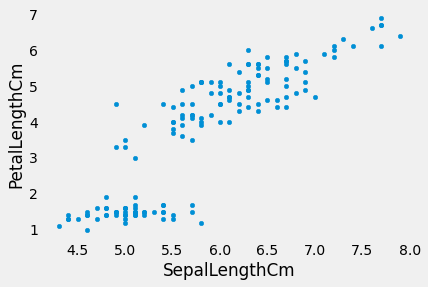

In [30]:
iris_df.plot(kind ="scatter", 
          x ='SepalLengthCm', 
          y ='PetalLengthCm') 
plt.grid()

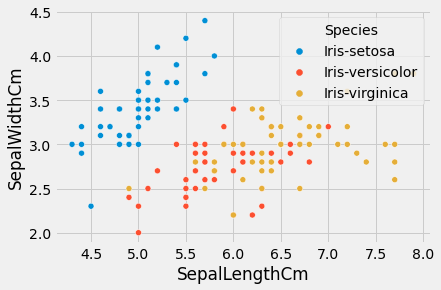

In [31]:
sns.scatterplot(x=iris_df["SepalLengthCm"], y=iris_df["SepalWidthCm"], hue=iris_df["Species"])
plt.show()

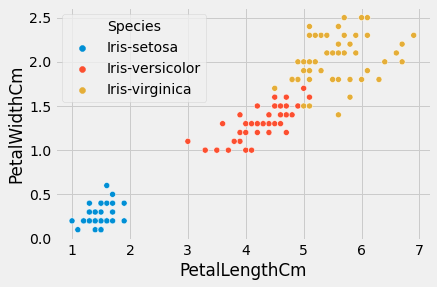

In [33]:
sns.scatterplot(x=iris_df["PetalLengthCm"], y=iris_df["PetalWidthCm"], hue=iris_df["Species"])
plt.show()

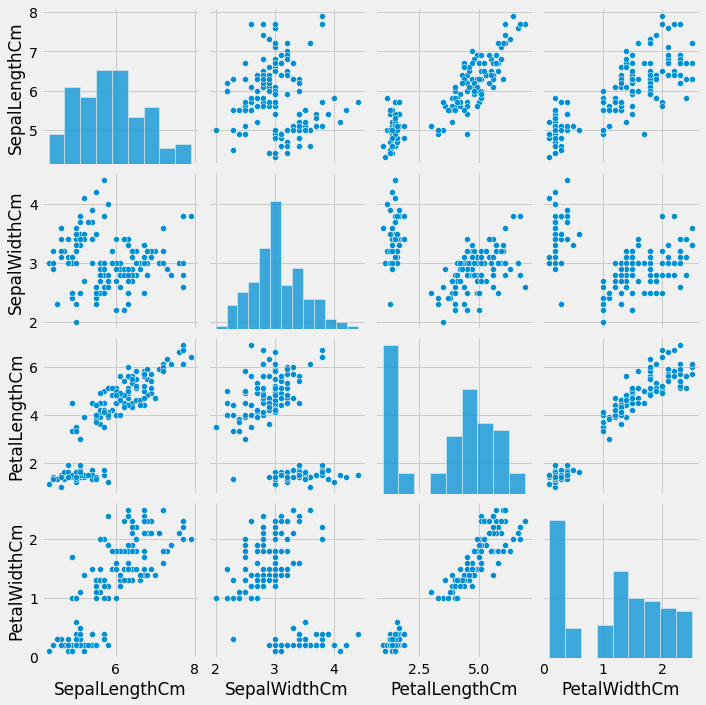

In [35]:
sns.pairplot(iris_df, height=2.5)

# **Using Elbow Method to find the optimum number of clusters**

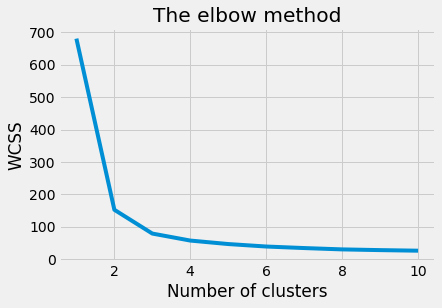

In [36]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as "3".

# **Applying K-Means to the dataset**

In [37]:
#Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

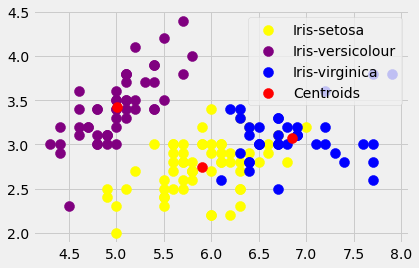

In [44]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()